In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
fm = tf.keras.datasets.fashion_mnist
(Xtr,ytr),(Xtst,ytst) = fm.load_data()

In [4]:
Xtr.shape

(60000, 28, 28)

In [7]:
np.unique(ytr)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [8]:
cn = ['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankel Boot']

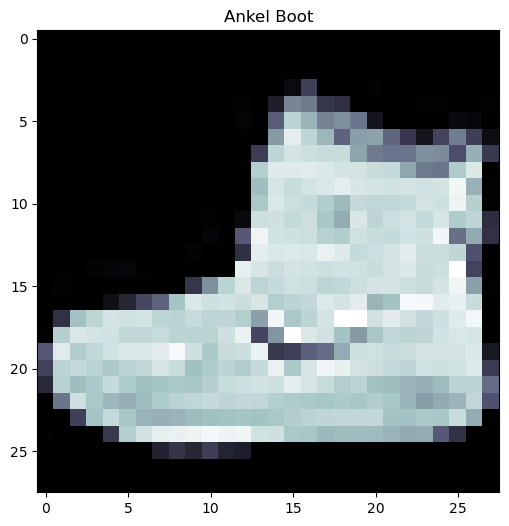

In [16]:
plt.figure(figsize=(10,6))
plt.imshow(Xtr[0],cmap=plt.cm.bone)
plt.title(cn[ytr[0]])
plt.show()

In [17]:
# Normalize the datasets
Xtr = Xtr/255.0
Xtst = Xtst/255.0

In [19]:
nnModel = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(200,activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(10)
])

In [22]:
nnModel.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits='True'),metrics=['accuracy'])

In [23]:
nnModel.fit(Xtr,ytr,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 1ms/step - loss: 0.5412 - accuracy: 0.8040
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4136 - accuracy: 0.8509
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3808 - accuracy: 0.8619
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3615 - accuracy: 0.8674
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3425 - accuracy: 0.8736
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3315 - accuracy: 0.8769
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3215 - accuracy: 0.8799
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3135 - accuracy: 0.8845
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3074 - accuracy: 0.8861
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.300

In [29]:
nnModel = tf.keras.Sequential([nnModel,tf.keras.layers.Softmax()])

In [30]:
y_pred = nnModel.predict(Xtst)

313/313 [==============================] - 0s 710us/step


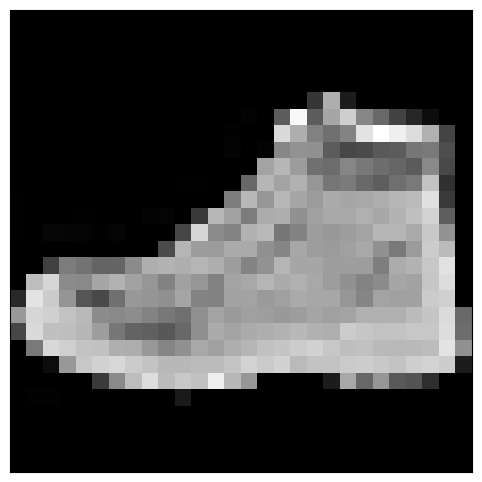

Predicted label : Ankel Boot Actual label : Ankel Boot


In [47]:
i = 28
fig = plt.figure(figsize=(10,6))
plt.imshow(Xtst[i],cmap=plt.cm.gray)
plt.xticks([])
plt.yticks([])
plt.show()
print(f'Predicted label : {cn[np.argmax(y_pred[i])]} Actual label : {cn[ytst[i]]}')